In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os

In [2]:
(X_train_full,y_train_full), (X_test,y_test)=keras.datasets.cifar10.load_data()

X_train_full,X_test=X_train_full/255.0, X_test/255.0

X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,
                                                 test_size=0.1,stratify=y_train_full)

In [10]:
def build_model(n_hidden,learning_rate):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    for hidden in range(n_hidden):
        model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal"))
    
    optimizer=keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [11]:
log_dir=os.path.join(os.curdir,"my_logs","ch11_ex8")
tb_cb=keras.callbacks.TensorBoard(log_dir)

lr_rates=[1e-2,3e-3,1e-3,3e-4,1e-4,3e-5,1e-5]

for lr_rate, n in lr_rates, range(len(lr_rates)):
    model=build_model(20,lr_rate)
    history=model.fit(X_train,y_train,epochs=10,
                     validation_data=(X_valid,y_valid),
                     callbacks=[tb_cb])


Epoch 1/10
   1/1407 [..............................] - ETA: 0s - loss: 3.4913 - accuracy: 0.1562WARNING:tensorflow:From C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 8s 6ms/step - loss: 2.5099 - accuracy: 0.1486 - val_loss: 2.2952 - val_accuracy: 0.1446
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 17547564.0000 - accuracy: 0.1145 - val_loss: 2.3117 - val_accuracy: 0.1000
Epoch 3/10
1407/1407 [==============================] - 8s 5ms/step - loss: 2.3086 - accuracy: 0.1007 - val_loss: 2.3217 - val_accuracy: 0.1000
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.3100 - accuracy: 0.1003 - val_loss: 2.3147 - val_accuracy: 0.1000
Epoch 5/10
1407/1407 [==============

1407/1407 [==============================] - 8s 6ms/step - loss: 1.4634 - accuracy: 0.4753 - val_loss: 1.5553 - val_accuracy: 0.4414
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4295 - accuracy: 0.4887 - val_loss: 1.5014 - val_accuracy: 0.4596
Epoch 8/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3980 - accuracy: 0.4957 - val_loss: 1.4958 - val_accuracy: 0.4686
Epoch 9/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3726 - accuracy: 0.5048 - val_loss: 1.4471 - val_accuracy: 0.4842
Epoch 10/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3487 - accuracy: 0.5146 - val_loss: 1.4381 - val_accuracy: 0.4904
Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9769 - accuracy: 0.2879 - val_loss: 1.8081 - val_accuracy: 0.3390
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7533 - accuracy: 0.3679 - val_loss: 1.7138 - val_accuracy: 0.3830
Ep

In [16]:
K = keras.backend

class ExponentialLR(keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor=factor
        self.rates=[]
        self.losses=[]
    def on_batch_end(self,batch,logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr,self.model.optimizer.lr*self.factor)

In [19]:
exp_lr_cb=ExponentialLR(1.007)

model=build_model(20,3e-5)
history=model.fit(X_train,y_train,epochs=1, validation_data=(X_valid,y_valid),
                 callbacks=[exp_lr_cb])

1407/1407 [==============================] - 9s 6ms/step - loss: 1928937363412229317264932864.0000 - accuracy: 0.1404 - val_loss: 41416825772501724378519568384.0000 - val_accuracy: 0.1000


2.204674005508423
0.00035444554


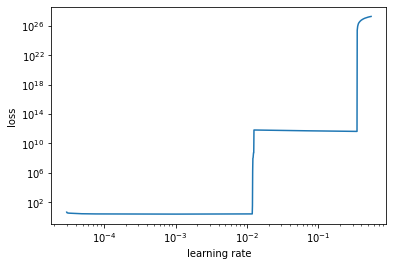

In [32]:
plt.plot(exp_lr_cb.rates,exp_lr_cb.losses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.xscale("log")
plt.yscale("log")
print(min(exp_lr_cb.losses))
print(exp_lr_cb.rates[exp_lr_cb.losses.index(min(exp_lr_cb.losses))])

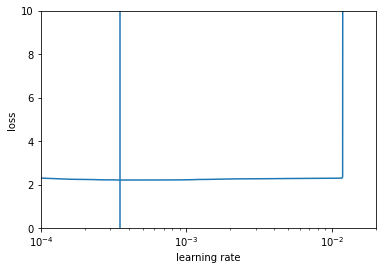

In [37]:
#wyglada na to że loss zaczyna wzrastac przy lr=0.00035 wiec  lr=1.5e-4 powinno byc ok
plt.plot(exp_lr_cb.rates,exp_lr_cb.losses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.xscale("log")
plt.xlim(1e-4,2e-2)
plt.ylim(0,10)
plt.vlines(0.00035,0,10000)

In [38]:
model=build_model(20,1.5e-4)
es_cb=keras.callbacks.EarlyStopping(patience=10)

model=build_model(20,3e-5)
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid),
                 callbacks=[es_cb])

Epoch 1/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9545 - accuracy: 0.2927 - val_loss: 1.7913 - val_accuracy: 0.3604
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7290 - accuracy: 0.3718 - val_loss: 1.7284 - val_accuracy: 0.3892
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6490 - accuracy: 0.4024 - val_loss: 1.7038 - val_accuracy: 0.3894
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5933 - accuracy: 0.4268 - val_loss: 1.6728 - val_accuracy: 0.3980
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5511 - accuracy: 0.4414 - val_loss: 1.5669 - val_accuracy: 0.4314
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5164 - accuracy: 0.4546 - val_loss: 1.5399 - val_accuracy: 0.4436
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4872 - accuracy: 0.4660 - val_loss: 1.5253 - val_ac

In [ ]:
model.evaluate(X_test,y_test)

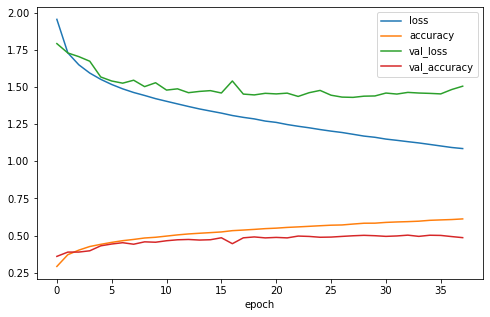

In [40]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("epoch")
plt.legend()

In [45]:
def build_model_BN(n_hidden,learning_rate):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    model.add(keras.layers.BatchNormalization())
    for hidden in range(n_hidden):
        model.add(keras.layers.Dense(100,kernel_initializer="he_normal"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Activation("elu"))
    model.add(keras.layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal"))
    
    optimizer=keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

1407/1407 [==============================] - 23s 16ms/step - loss: 10.5151 - accuracy: 0.2296 - val_loss: 8600.2842 - val_accuracy: 0.1090
2.0875725746154785
0.096656956


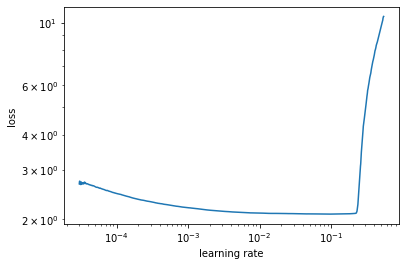

In [48]:
exp_lr_cb=ExponentialLR(1.007)

model=build_model_BN(20,3e-5)
history=model.fit(X_train,y_train,epochs=1, validation_data=(X_valid,y_valid),
                 callbacks=[exp_lr_cb])
plt.plot(exp_lr_cb.rates,exp_lr_cb.losses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.xscale("log")
plt.yscale("log")
print(min(exp_lr_cb.losses))
print(exp_lr_cb.rates[exp_lr_cb.losses.index(min(exp_lr_cb.losses))])

In [49]:
# loss zaczal isc w gore dla lr=0.09 wiec ustawie lr=0.04 
#okazuje sie ze ta metoda szukania lr nie jest zbyt dobra poniewaz loss i accuracy strasznie skacze
model=build_model_BN(20,4e-2)
es_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid),
                 callbacks=[es_cb])

Epoch 1/100
1407/1407 [==============================] - 22s 15ms/step - loss: 2.0219 - accuracy: 0.2255 - val_loss: 2.4487 - val_accuracy: 0.2016
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.8740 - accuracy: 0.2781 - val_loss: 2.2674 - val_accuracy: 0.1962
Epoch 3/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.8006 - accuracy: 0.3216 - val_loss: 3.3018 - val_accuracy: 0.1896
Epoch 4/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7536 - accuracy: 0.3503 - val_loss: 3.9071 - val_accuracy: 0.1770
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.7071 - accuracy: 0.3717 - val_loss: 3.8304 - val_accuracy: 0.1824
Epoch 6/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6744 - accuracy: 0.3882 - val_loss: 2.1606 - val_accuracy: 0.2396
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6416 - accuracy: 0.3996 - val_loss: 3

KeyboardInterrupt: 

In [50]:
lr_rates=[1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3]
run_number=0
for lr_rate in lr_rates:
    run_number+=1
    model=build_model_BN(20,lr_rate)
    log_dir=os.path.join(os.curdir,"my_logs","ch11_ex8","run_bn_{:03d}".format(run_number))
    tb_cb=keras.callbacks.TensorBoard(log_dir)
    history=model.fit(X_train,y_train,epochs=20, validation_data=(X_valid,y_valid),
                 callbacks=[tb_cb])

Epoch 1/20
1407/1407 [==============================] - 27s 19ms/step - loss: 2.0188 - accuracy: 0.2310 - val_loss: 2.7873 - val_accuracy: 0.2358
Epoch 2/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.8580 - accuracy: 0.2961 - val_loss: 2.9601 - val_accuracy: 0.1562
Epoch 3/20
1407/1407 [==============================] - 23s 16ms/step - loss: 1.7722 - accuracy: 0.3398 - val_loss: 1.9842 - val_accuracy: 0.3258
Epoch 4/20
1407/1407 [==============================] - 23s 16ms/step - loss: 1.7232 - accuracy: 0.3682 - val_loss: 3.8904 - val_accuracy: 0.1918
Epoch 5/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6929 - accuracy: 0.3824 - val_loss: 4.8003 - val_accuracy: 0.1624
Epoch 6/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6658 - accuracy: 0.3927 - val_loss: 5.1996 - val_accuracy: 0.1782
Epoch 7/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.6375 - accuracy: 0.4066 - val_loss: 5.2253 -

1407/1407 [==============================] - 22s 16ms/step - loss: 1.5713 - accuracy: 0.4387 - val_loss: 2.8202 - val_accuracy: 0.2358
Epoch 12/20
1407/1407 [==============================] - 22s 15ms/step - loss: 1.5518 - accuracy: 0.4454 - val_loss: 3.9858 - val_accuracy: 0.2394
Epoch 13/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5393 - accuracy: 0.4543 - val_loss: 1.7621 - val_accuracy: 0.3854
Epoch 14/20
1407/1407 [==============================] - 22s 15ms/step - loss: 1.5248 - accuracy: 0.4604 - val_loss: 1.7292 - val_accuracy: 0.3818
Epoch 15/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5053 - accuracy: 0.4657 - val_loss: 1.8227 - val_accuracy: 0.3768
Epoch 16/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4970 - accuracy: 0.4727 - val_loss: 3.6758 - val_accuracy: 0.2538
Epoch 17/20
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4877 - accuracy: 0.4749 - val_loss: 1.8302 - val_

1407/1407 [==============================] - 21s 15ms/step - loss: 2.0042 - accuracy: 0.2501 - val_loss: 2.3869 - val_accuracy: 0.2290
Epoch 2/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.8153 - accuracy: 0.3202 - val_loss: 3.7106 - val_accuracy: 0.1578
Epoch 3/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7227 - accuracy: 0.3618 - val_loss: 1.9631 - val_accuracy: 0.3430
Epoch 4/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6701 - accuracy: 0.3900 - val_loss: 2.1958 - val_accuracy: 0.2670
Epoch 5/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.6224 - accuracy: 0.4121 - val_loss: 2.1796 - val_accuracy: 0.3240
Epoch 6/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5908 - accuracy: 0.4250 - val_loss: 2.3407 - val_accuracy: 0.2390
Epoch 7/20
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5564 - accuracy: 0.4385 - val_loss: 1.9490 - val_accura

In [52]:
#po sprawdzeniu tensorboard lr=1e-3 wyglada dobrze
model=build_model_BN(20,1e-3)
es_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid),
                 callbacks=[es_cb])

Epoch 1/100
1407/1407 [==============================] - 22s 15ms/step - loss: 1.8377 - accuracy: 0.3415 - val_loss: 1.7110 - val_accuracy: 0.3888
Epoch 2/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6760 - accuracy: 0.4032 - val_loss: 1.6051 - val_accuracy: 0.4228
Epoch 3/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6077 - accuracy: 0.4274 - val_loss: 1.5206 - val_accuracy: 0.4592
Epoch 4/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.5563 - accuracy: 0.4491 - val_loss: 1.4782 - val_accuracy: 0.4728
Epoch 5/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5151 - accuracy: 0.4617 - val_loss: 1.4722 - val_accuracy: 0.4850
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4790 - accuracy: 0.4763 - val_loss: 1.4660 - val_accuracy: 0.4808
Epoch 7/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4444 - accuracy: 0.4867 - val_loss: 1

In [53]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3426 - accuracy: 0.5281


[1.342589020729065, 0.5281000137329102]

In [56]:
def build_model_SELU(n_hidden,learning_rate):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    
    for hidden in range(n_hidden):
        model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
        
    model.add(keras.layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal"))
    optimizer=keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [58]:
lr_rates=[1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3]
run_number=0
for lr_rate in lr_rates:
    run_number+=1
    model=build_model_SELU(20,lr_rate)
    log_dir=os.path.join(os.curdir,"my_logs","ch11_ex8","run_selu_{:03d}".format(run_number))
    tb_cb=keras.callbacks.TensorBoard(log_dir)
    history=model.fit(X_train,y_train,epochs=20, validation_data=(X_valid,y_valid),
                 callbacks=[tb_cb])

Epoch 1/20
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0057 - accuracy: 0.2698 - val_loss: 1.8821 - val_accuracy: 0.3094
Epoch 2/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7977 - accuracy: 0.3549 - val_loss: 1.7344 - val_accuracy: 0.3764
Epoch 3/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7186 - accuracy: 0.3822 - val_loss: 1.6913 - val_accuracy: 0.3896
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6690 - accuracy: 0.4001 - val_loss: 1.6802 - val_accuracy: 0.3998
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6305 - accuracy: 0.4159 - val_loss: 1.6246 - val_accuracy: 0.4152
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6000 - accuracy: 0.4262 - val_loss: 1.6187 - val_accuracy: 0.4184
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5749 - accuracy: 0.4360 - val_loss: 1.5888 - val_accuracy

1407/1407 [==============================] - 8s 5ms/step - loss: 1.3621 - accuracy: 0.5100 - val_loss: 1.4448 - val_accuracy: 0.4802
Epoch 13/20
1407/1407 [==============================] - 8s 5ms/step - loss: 1.3412 - accuracy: 0.5202 - val_loss: 1.4678 - val_accuracy: 0.4766
Epoch 14/20
1407/1407 [==============================] - 8s 5ms/step - loss: 1.3267 - accuracy: 0.5224 - val_loss: 1.4522 - val_accuracy: 0.4864
Epoch 15/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3098 - accuracy: 0.5325 - val_loss: 1.4374 - val_accuracy: 0.4876
Epoch 16/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2923 - accuracy: 0.5375 - val_loss: 1.4336 - val_accuracy: 0.4872
Epoch 17/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.2784 - accuracy: 0.5403 - val_loss: 1.4685 - val_accuracy: 0.4800
Epoch 18/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2633 - accuracy: 0.5465 - val_loss: 1.4245 - val_accuracy: 0.49

1407/1407 [==============================] - 8s 6ms/step - loss: 1.7476 - accuracy: 0.3684 - val_loss: 1.9257 - val_accuracy: 0.3170
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6842 - accuracy: 0.3958 - val_loss: 1.6652 - val_accuracy: 0.4040
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6329 - accuracy: 0.4169 - val_loss: 1.6319 - val_accuracy: 0.4050
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5969 - accuracy: 0.4273 - val_loss: 1.7660 - val_accuracy: 0.3872
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5595 - accuracy: 0.4470 - val_loss: 1.6581 - val_accuracy: 0.4256
Epoch 8/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5305 - accuracy: 0.4561 - val_loss: 1.5406 - val_accuracy: 0.4476
Epoch 9/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5024 - accuracy: 0.4668 - val_loss: 1.5750 - val_accuracy: 0.4434
Epo

In [59]:
#l4=3e-4 wyglada dobrze
model=build_model_SELU(20,3e-4)
es_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid),
                 callbacks=[es_cb])

Epoch 1/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9805 - accuracy: 0.2735 - val_loss: 1.8337 - val_accuracy: 0.3408
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7781 - accuracy: 0.3601 - val_loss: 1.7082 - val_accuracy: 0.3766
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6952 - accuracy: 0.3911 - val_loss: 1.7329 - val_accuracy: 0.3822
Epoch 4/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6347 - accuracy: 0.4144 - val_loss: 1.6335 - val_accuracy: 0.4146
Epoch 5/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5894 - accuracy: 0.4309 - val_loss: 1.6697 - val_accuracy: 0.3972
Epoch 6/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5500 - accuracy: 0.4449 - val_loss: 1.6478 - val_accuracy: 0.4124
Epoch 7/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5126 - accuracy: 0.4590 - val_loss: 1.5867 - val_ac

In [60]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4409 - accuracy: 0.5131


[1.4408578872680664, 0.5131000280380249]

In [5]:
def build_model_SELU_AD(n_hidden,learning_rate):
    model=keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    
    for hidden in range(n_hidden-3):
        model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
    for hidden in range(3):
        model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
        model.add(keras.layers.AlphaDropout(0.2))
        
    model.add(keras.layers.Dense(10,activation="softmax",kernel_initializer="glorot_normal"))
    optimizer=keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [6]:
lr_rates=[1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3]
run_number=0
for lr_rate in lr_rates:
    run_number+=1
    model=build_model_SELU_AD(20,lr_rate)
    log_dir=os.path.join(os.curdir,"my_logs","ch11_ex8","run_selu_AD{:03d}".format(run_number))
    tb_cb=keras.callbacks.TensorBoard(log_dir)
    history=model.fit(X_train,y_train,epochs=20, validation_data=(X_valid,y_valid),
                 callbacks=[tb_cb])

Epoch 1/20
   1/1407 [..............................] - ETA: 0s - loss: 2.8078 - accuracy: 0.0312WARNING:tensorflow:From C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 9s 6ms/step - loss: 2.6282 - accuracy: 0.1537 - val_loss: 2.0624 - val_accuracy: 0.2962
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3495 - accuracy: 0.2093 - val_loss: 2.1328 - val_accuracy: 0.3148
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 2.2227 - accuracy: 0.2395 - val_loss: 2.1291 - val_accuracy: 0.3312
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 2.1255 - accuracy: 0.2606 - val_loss: 1.9780 - val_accuracy: 0.3466
Epoch 5/20
1407/1407 [=====================

1407/1407 [==============================] - 8s 6ms/step - loss: 1.5812 - accuracy: 0.4346 - val_loss: 1.7894 - val_accuracy: 0.4390
Epoch 10/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5551 - accuracy: 0.4456 - val_loss: 1.6559 - val_accuracy: 0.4476
Epoch 11/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5317 - accuracy: 0.4546 - val_loss: 1.6638 - val_accuracy: 0.4532
Epoch 12/20
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5139 - accuracy: 0.4610 - val_loss: 1.5992 - val_accuracy: 0.4498
Epoch 13/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4931 - accuracy: 0.4672 - val_loss: 1.6283 - val_accuracy: 0.4644
Epoch 14/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4729 - accuracy: 0.4764 - val_loss: 1.7207 - val_accuracy: 0.4692
Epoch 15/20
1407/1407 [==============================] - 8s 5ms/step - loss: 1.4558 - accuracy: 0.4815 - val_loss: 1.6339 - val_accuracy: 0.46

1407/1407 [==============================] - 8s 6ms/step - loss: 2.1585 - accuracy: 0.1943 - val_loss: 2.1377 - val_accuracy: 0.2318
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9610 - accuracy: 0.2546 - val_loss: 1.9948 - val_accuracy: 0.2578
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8904 - accuracy: 0.2872 - val_loss: 1.9010 - val_accuracy: 0.3056
Epoch 4/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8437 - accuracy: 0.3113 - val_loss: 1.9376 - val_accuracy: 0.3274
Epoch 5/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8016 - accuracy: 0.3302 - val_loss: 1.8901 - val_accuracy: 0.3216
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7536 - accuracy: 0.3508 - val_loss: 1.9435 - val_accuracy: 0.3610
Epoch 7/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7140 - accuracy: 0.3667 - val_loss: 1.8356 - val_accuracy: 0.3784
Epo

In [7]:
#lr wyglada dobrze pomiedzy 1e-4 i 3e-4
model=build_model_SELU_AD(20,2e-4)
es_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=100, validation_data=(X_valid,y_valid),
                 callbacks=[es_cb])

Epoch 1/100
1407/1407 [==============================] - 9s 6ms/step - loss: 2.1903 - accuracy: 0.2191 - val_loss: 2.0117 - val_accuracy: 0.3172
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8863 - accuracy: 0.3138 - val_loss: 1.9878 - val_accuracy: 0.2998
Epoch 3/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7877 - accuracy: 0.3574 - val_loss: 1.7687 - val_accuracy: 0.3986
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7202 - accuracy: 0.3837 - val_loss: 1.7220 - val_accuracy: 0.4108
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6639 - accuracy: 0.4056 - val_loss: 1.8143 - val_accuracy: 0.4130
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6249 - accuracy: 0.4230 - val_loss: 1.7841 - val_accuracy: 0.4326
Epoch 7/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5887 - accuracy: 0.4386 - val_loss: 1.6828 - val_ac

In [8]:
# lol
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5844 - accuracy: 0.4807


[1.5843769311904907, 0.48069998621940613]

In [27]:
y_probas=np.array([model(X_test,training=True) for sample in range(20)])
y_proba=np.mean(y_probas,axis=0)
y_pred=np.argmax(y_proba,axis=1)

In [37]:
# 0.004 wiecej
accuracy=np.sum(y_pred==y_test.reshape(-1))/len(y_test)
accuracy

0.484